In [2]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

In [3]:
strokeData = pd.read_csv('healthcare-dataset-stroke-data.csv')
strokeData.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
#remove NaN in bmi and replace with median so data is still usable
bmiMedian = strokeData['bmi'].median()
strokeData['bmi'] = strokeData['bmi'].fillna(bmiMedian)
    
strokeData.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
#Extract individual columns into their respective data frames
gender = pd.DataFrame(strokeData['gender'])
age = pd.DataFrame(strokeData['age'])
hypertension = pd.DataFrame(strokeData['hypertension'])
heart_disease = pd.DataFrame(strokeData['heart_disease'])
ever_married = pd.DataFrame(strokeData['ever_married'])
work_type = pd.DataFrame(strokeData['work_type'])
Residence_type = pd.DataFrame(strokeData['Residence_type'])
avg_glucose_level = pd.DataFrame(strokeData['avg_glucose_level'])
bmi = pd.DataFrame(strokeData['bmi'])
smoking_status = pd.DataFrame(strokeData['smoking_status'])
stroke = pd.DataFrame(strokeData['stroke'])

C:\Users\suki\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='count'>

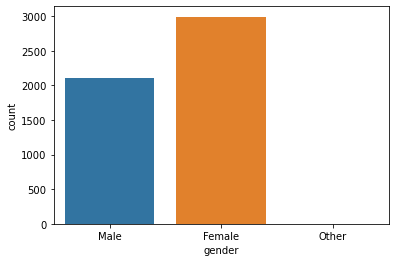

In [6]:
#find out gender distribution
sb.countplot(strokeData['gender'])

<AxesSubplot:xlabel='heart_disease', ylabel='hypertension'>

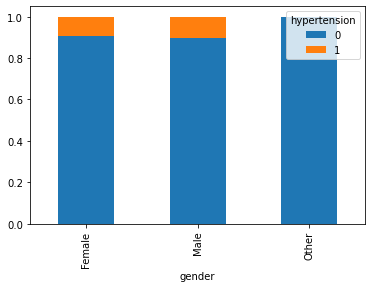

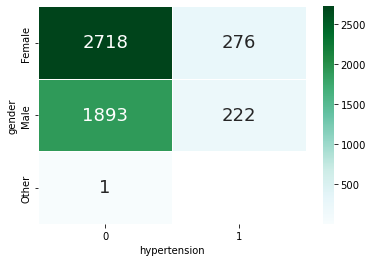

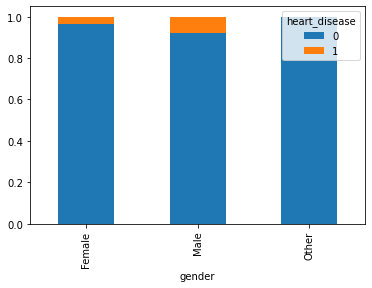

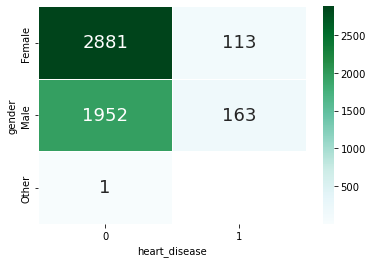

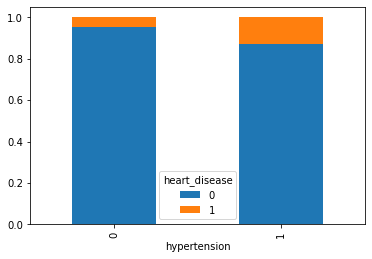

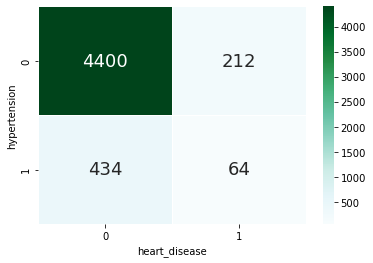

In [19]:
#comparision between gender and hypertension and heart disease (categorical against categorical) using barplot 
# Create a joint dataframe by concatenating the two variables
jointgenhyp = pd.concat([gender, hypertension], axis = 1).reindex(gender.index)
jointgenhyp.head()
(pd.crosstab(jointgenhyp['gender'],jointgenhyp['hypertension'], normalize='index').plot.bar(stacked=True))

f = plt.figure(figsize=(6, 4))
sb.heatmap(jointgenhyp.groupby(['gender', 'hypertension']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

#results: Gender as a factor of occurence of hypertension is not very strong, since both male and female have roughly same risk
jointgenHD = pd.concat([gender, heart_disease], axis = 1).reindex(gender.index)
jointgenHD.head()
(pd.crosstab(jointgenHD['gender'],jointgenHD['heart_disease'], normalize='index').plot.bar(stacked=True))

f = plt.figure(figsize=(6, 4))
sb.heatmap(jointgenHD.groupby(['gender', 'heart_disease']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")
#results: Males have slightly higher chances of heart disease
jointhypHD = pd.concat([hypertension, heart_disease], axis = 1).reindex(hypertension.index)
jointhypHD.head()
(pd.crosstab(jointhypHD['hypertension'],jointhypHD['heart_disease'], normalize='index').plot.bar(stacked=True))

f = plt.figure(figsize=(6, 4))
sb.heatmap(jointhypHD.groupby(['hypertension', 'heart_disease']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")
#The chances of getting heart disease is higher if you have hypertension, vice versa.

<AxesSubplot:xlabel='avg_glucose_level', ylabel='gender'>

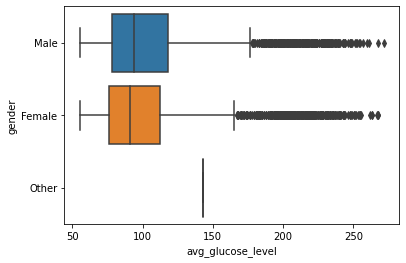

In [8]:
#Gender vs avg_glucose_level
jointgenGL = pd.concat([gender, avg_glucose_level], axis = 1).reindex(gender.index)

sb.boxplot(data = jointgenGL, x= 'avg_glucose_level', y= 'gender')

<AxesSubplot:xlabel='bmi', ylabel='gender'>

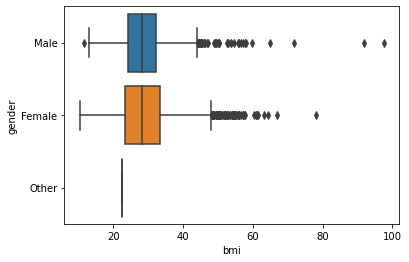

In [9]:
#Gender vs bmi
jointgenbmi = pd.concat([gender, bmi], axis = 1).reindex(gender.index)

sb.boxplot(data = jointgenbmi, x= 'bmi', y= 'gender')

<AxesSubplot:xlabel='smoking_status', ylabel='gender'>

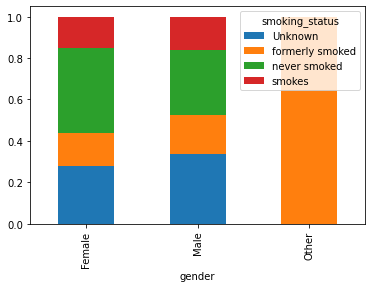

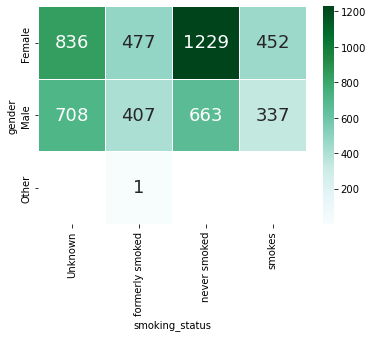

In [20]:
#Gender vs smoking_status
jointgenSS = pd.concat([gender, smoking_status], axis = 1).reindex(gender.index)

(pd.crosstab(jointgenSS['gender'],jointgenSS['smoking_status'], normalize='index').plot.bar(stacked=True))

f = plt.figure(figsize=(6, 4))
sb.heatmap(jointgenSS.groupby(['gender', 'smoking_status']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

<AxesSubplot:xlabel='stroke', ylabel='gender'>

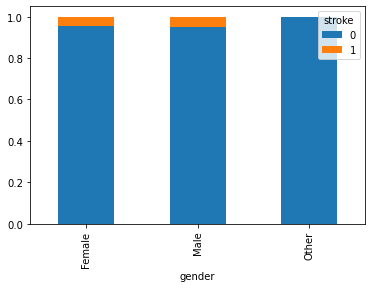

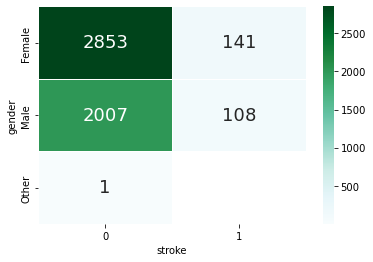

In [21]:
#Gender vs stroke
jointgenS = pd.concat([gender, stroke], axis = 1).reindex(gender.index)

(pd.crosstab(jointgenS['gender'],jointgenS['stroke'], normalize='index').plot.bar(stacked=True))

f = plt.figure(figsize=(6, 4))
sb.heatmap(jointgenS.groupby(['gender', 'stroke']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

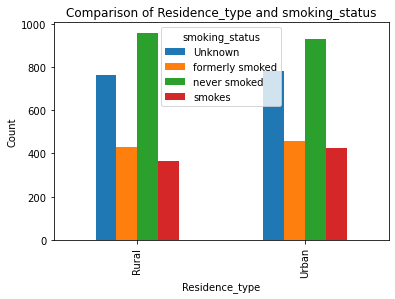

<AxesSubplot:xlabel='smoking_status', ylabel='Residence_type'>

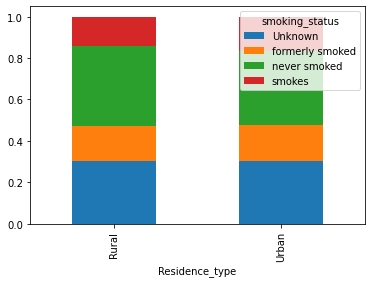

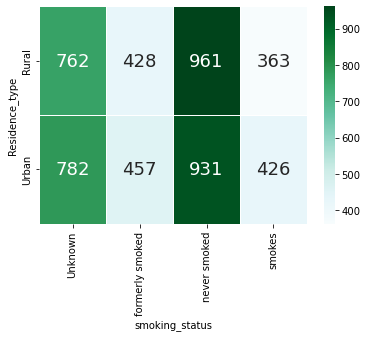

In [22]:
#compare residence with smoking status 
jointresSS = pd.concat([Residence_type, smoking_status], axis = 1).reindex(Residence_type.index)

# Count the number of occurrences of each category of var1 and var2
counts = jointresSS.groupby(['Residence_type', 'smoking_status']).size().reset_index(name='count')

# Plot the grouped bar chart
counts.pivot(index='Residence_type', columns='smoking_status', values='count').plot(kind='bar')

# Add labels and title
plt.xlabel('Residence_type')
plt.ylabel('Count')
plt.title('Comparison of Residence_type and smoking_status')
plt.show()

(pd.crosstab(jointresSS['Residence_type'],jointresSS['smoking_status'], normalize='index').plot.bar(stacked=True))

#Using heatmap
f = plt.figure(figsize=(6, 4))
sb.heatmap(jointresSS.groupby(['Residence_type', 'smoking_status']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")


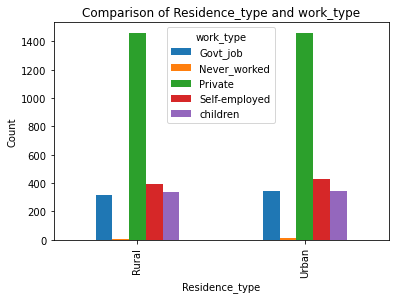

<AxesSubplot:xlabel='Residence_type'>

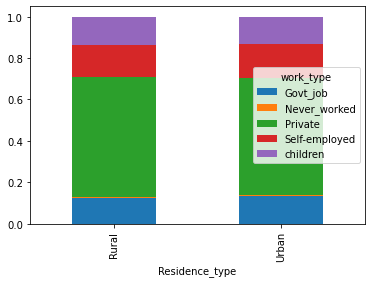

In [13]:
#compare residence with work type
jointresWT = pd.concat([Residence_type, work_type], axis = 1).reindex(Residence_type.index)

# Count the number of occurrences of each category of var1 and var2
counts = jointresWT.groupby(['Residence_type', 'work_type']).size().reset_index(name='count')

# Plot the grouped bar chart
counts.pivot(index='Residence_type', columns='work_type', values='count').plot(kind='bar')

# Add labels and title
plt.xlabel('Residence_type')
plt.ylabel('Count')
plt.title('Comparison of Residence_type and work_type')
plt.show()

(pd.crosstab(jointresWT['Residence_type'],jointresWT['work_type'], normalize='index').plot.bar(stacked=True))

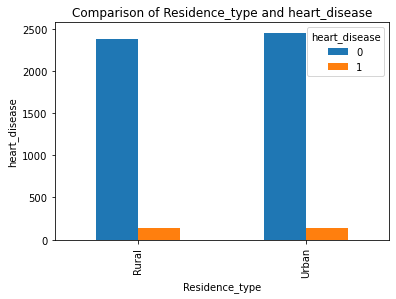

<AxesSubplot:xlabel='Residence_type'>

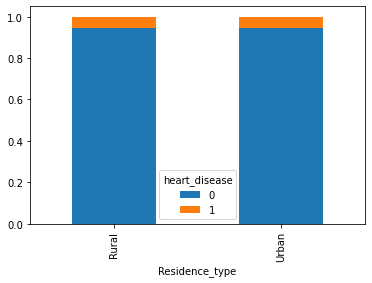

In [14]:
#compare residence with heart disease
jointresHD = pd.concat([Residence_type, heart_disease], axis = 1).reindex(Residence_type.index)

# Count the number of occurrences of each category of var1 and var2
counts = jointresHD.groupby(['Residence_type', 'heart_disease']).size().reset_index(name='count')

# Plot the grouped bar chart
counts.pivot(index='Residence_type', columns='heart_disease', values='count').plot(kind='bar')

# Add labels and title
plt.xlabel('Residence_type')
plt.ylabel('heart_disease')
plt.title('Comparison of Residence_type and heart_disease')
plt.show()

(pd.crosstab(jointresHD['Residence_type'],jointresHD['heart_disease'], normalize='index').plot.bar(stacked=True))

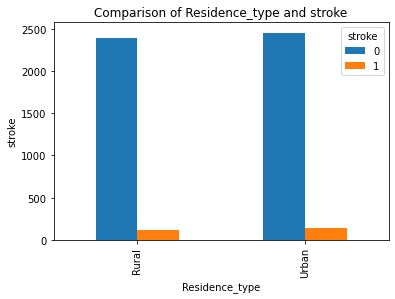

<AxesSubplot:xlabel='Residence_type'>

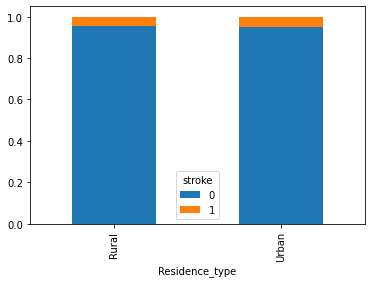

In [15]:
#compare residence with stroke
jointresS = pd.concat([Residence_type, stroke], axis = 1).reindex(Residence_type.index)

# Count the number of occurrences of each category of var1 and var2
counts = jointresS.groupby(['Residence_type', 'stroke']).size().reset_index(name='count')

# Plot the grouped bar chart
counts.pivot(index='Residence_type', columns='stroke', values='count').plot(kind='bar')

# Add labels and title
plt.xlabel('Residence_type')
plt.ylabel('stroke')
plt.title('Comparison of Residence_type and stroke')
plt.show()

(pd.crosstab(jointresS['Residence_type'],jointresS['stroke'], normalize='index').plot.bar(stacked=True))

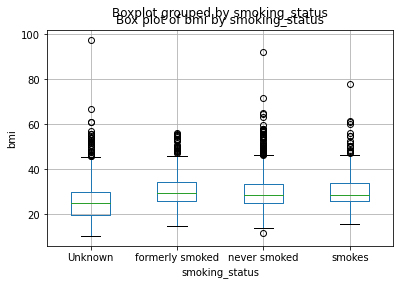

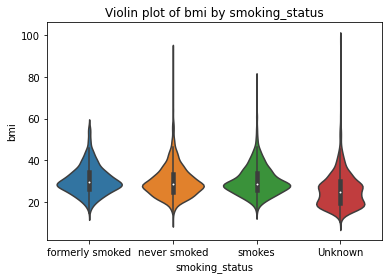

In [16]:
#smoking_status with bmi
jointSSbmi = pd.concat([smoking_status, bmi], axis = 1).reindex(smoking_status.index)

jointSSbmi.boxplot(column='bmi', by='smoking_status')

# Add labels and title
plt.xlabel('smoking_status')
plt.ylabel('bmi')
plt.title('Box plot of bmi by smoking_status')
plt.show()

sb.violinplot(x='smoking_status', y='bmi', data=jointSSbmi)

# Add labels and title
plt.xlabel('smoking_status')
plt.ylabel('bmi')
plt.title('Violin plot of bmi by smoking_status')
plt.show()

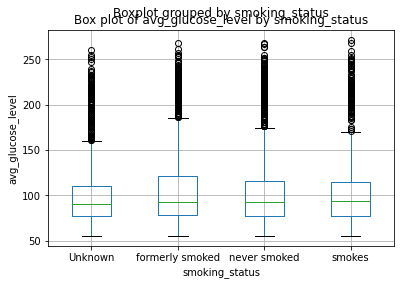

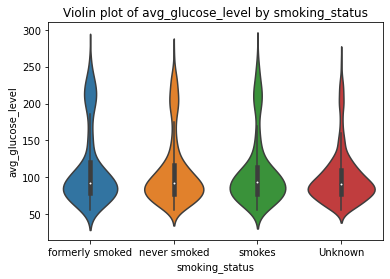

In [17]:
#smoking_status with avg_glucose_level
jointSSGL = pd.concat([smoking_status, avg_glucose_level], axis = 1).reindex(smoking_status.index)

jointSSGL.boxplot(column='avg_glucose_level', by='smoking_status')

# Add labels and title
plt.xlabel('smoking_status')
plt.ylabel('avg_glucose_level')
plt.title('Box plot of avg_glucose_level by smoking_status')
plt.show()

sb.violinplot(x='smoking_status', y='avg_glucose_level', data=jointSSGL)

# Add labels and title
plt.xlabel('smoking_status')
plt.ylabel('avg_glucose_level')
plt.title('Violin plot of avg_glucose_level by smoking_status')
plt.show()

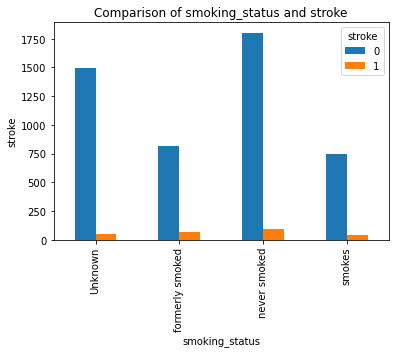

<AxesSubplot:xlabel='stroke', ylabel='smoking_status'>

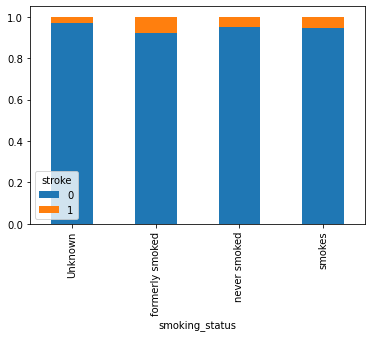

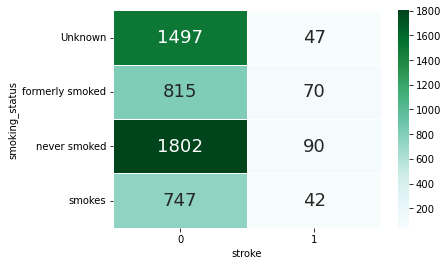

In [23]:
#smoking stauts with stroke
jointSSS = pd.concat([smoking_status, stroke], axis = 1).reindex(smoking_status.index)

# Count the number of occurrences of each category of var1 and var2
counts = jointSSS.groupby(['smoking_status', 'stroke']).size().reset_index(name='count')

# Plot the grouped bar chart
counts.pivot(index='smoking_status', columns='stroke', values='count').plot(kind='bar')

# Add labels and title
plt.xlabel('smoking_status')
plt.ylabel('stroke')
plt.title('Comparison of smoking_status and stroke')
plt.show()

(pd.crosstab(jointSSS['smoking_status'],jointSSS['stroke'], normalize='index').plot.bar(stacked=True))

#using heatmap
f = plt.figure(figsize=(6, 4))
sb.heatmap(jointSSS.groupby(['smoking_status', 'stroke']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")